In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pymc_experimental as pmx

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

In [3]:
funcs = [
    lambda x: 10 * x,
    lambda x: 10 * np.sin(x * 2 * np.pi),
    lambda x: 2 - 4 * np.where(x < 0.5, 1, 0),
]

In [4]:
X_lin = np.linspace(0, 1, 200)
Y_lin = rng.normal(funcs[0](X_lin), 2, size=200)
X_lin = X_lin[:, None]

X_sin = np.linspace(0, 1, 200)
Y_sin = rng.normal(funcs[1](X_sin), 2, size=200)
X_sin = X_sin[:, None]

X_stp = np.linspace(0, 1, 200)
Y_stp = np.random.normal(funcs[2](X_stp), 0.2, size=200)

X_stp = X_stp[:, None]


XS = [X_lin, X_sin, X_stp]
YS = [Y_lin, Y_sin, Y_stp]

In [5]:
idatas = []
for X, Y in zip(XS, YS):
    for m in [10, 50, 200]:
        with pm.Model() as functions:
            σ = pm.HalfNormal("σ", Y.std())
            μ = pmx.BART("μ", X, Y, m=m)
            y = pm.Normal("y", μ, σ, observed=Y)
            idata = pm.sample(random_seed=RANDOM_SEED)
            idatas.append(idata)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 63 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 304 seconds.
The acceptance probability does not match the target. It is 0.8858, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
The acceptance probability does not match the target. It is 0.6577, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.885, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 70 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 304 seconds.
The acceptance probability does not match the target. It is 0.8939, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
The acceptance probability does not match the target. It is 0.7115, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9477, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 69 seconds.
The acceptance probability does not match the target. It is 0.6805, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 290 seconds.
The acceptance probability does not match the target. It is 0.8826, but should be close to 0.8. Try to increase the number of tuning steps.


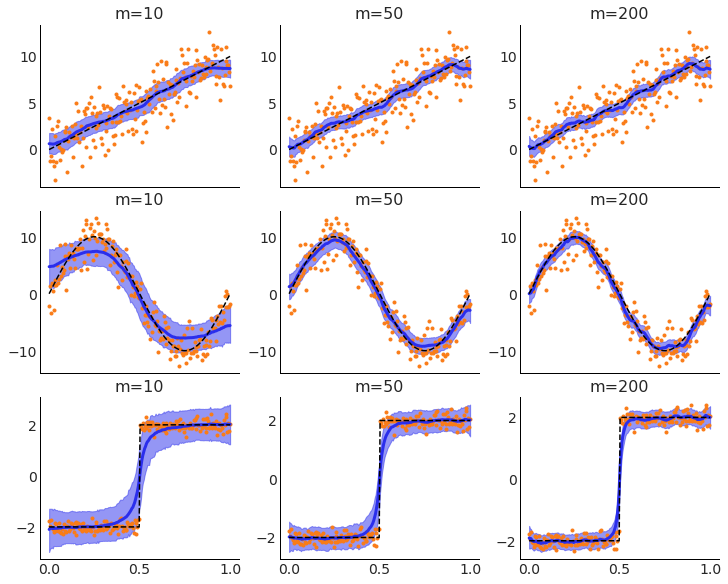

In [6]:
_, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=True)


for idata, ax, X, Y, f in zip(
    idatas,
    np.ravel(axes),
    np.repeat(XS, 3, 0),
    np.repeat(YS, 3, 0),
    np.repeat(funcs, 3),
):
    mean = idata.posterior["μ"].mean(dim=["draw", "chain"])
    ax.plot(X[:, 0], mean, lw=3)
    az.plot_hdi(X[:, 0], idata.posterior["μ"], color="C0", smooth=False, ax=ax)
    ax.plot(X[:, 0], Y, ".", zorder=1)
    ax.plot(X[:, 0], f(X), "k--")
    ax.set_title(f"m={len(idata.sample_stats.bart_trees_dim_0)}")
    plt.savefig("step_function.png")

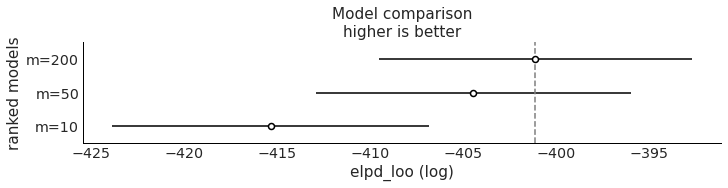

In [7]:
cmp = az.compare(dict(zip(["m=10", "m=50", "m=200"], idatas[:3])))
ax = az.plot_compare(cmp, plot_ic_diff=False, insample_dev=False, figsize=(10, 2.5), legend=False)
plt.savefig("LOO_lin.png")

/home/osvaldo/proyectos/00_BM/arviz/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/osvaldo/proyectos/00_BM/arviz/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


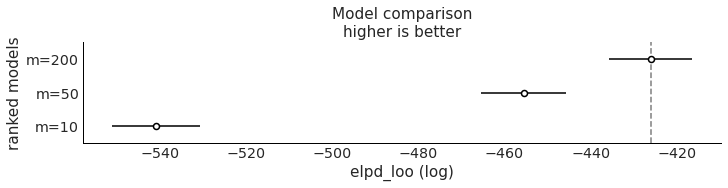

In [8]:
cmp = az.compare(dict(zip(["m=10", "m=50", "m=200"], idatas[3:6])))
ax = az.plot_compare(cmp, plot_ic_diff=False, insample_dev=False, figsize=(10, 2.5), legend=False)
plt.savefig("LOO_sin.png")

/home/osvaldo/proyectos/00_BM/arviz/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/osvaldo/proyectos/00_BM/arviz/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/osvaldo/proyectos/00_BM/arviz/arviz/stats/stats.py:802: UserWarning: Estimated shape param

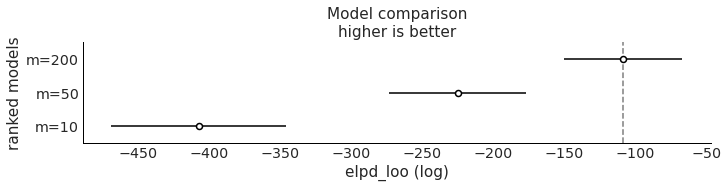

In [9]:
cmp = az.compare(dict(zip(["m=10", "m=50", "m=200"], idatas[6:])))
ax = az.plot_compare(cmp, plot_ic_diff=False, insample_dev=False, figsize=(10, 2.5), legend=False)
plt.savefig("LOO_stp.png")